In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch

In [2]:
import random

In [3]:
def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
features

tensor([[ 1.0882, -0.4145],
        [-0.3297,  0.8502],
        [-0.8160,  1.2407],
        ...,
        [ 1.2032,  1.4548],
        [ 0.0567, -0.6259],
        [ 1.4323,  0.6052]])

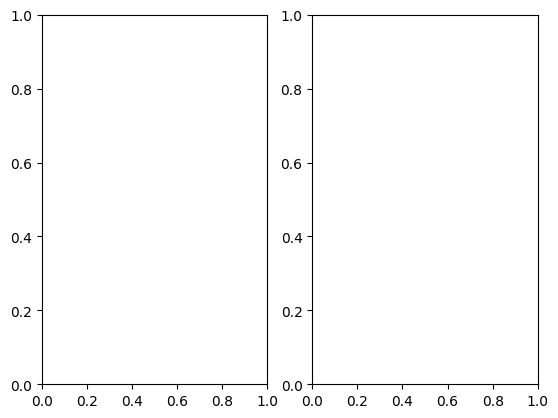

In [6]:
fig, axes = plt.subplots(1,2)

In [7]:
axes[0].scatter(features[:,1].detach().numpy(), labels.detach().numpy(),s=1.5)
axes[1].scatter(features[:,0].detach().numpy(), labels.detach().numpy(),s=1.5, c='b')

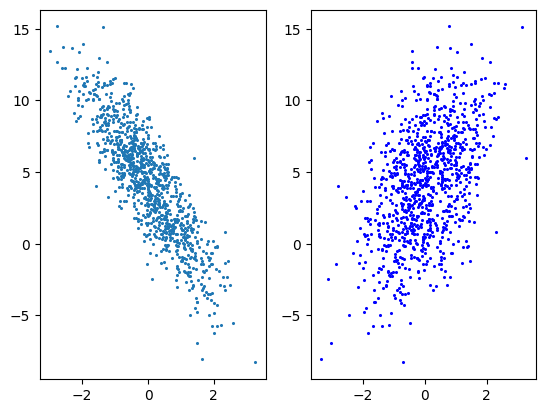

In [8]:
fig

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size=10

for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tensor([[ 0.2245, -0.1980],
        [-0.8649,  0.4874],
        [-1.2461,  0.6459],
        [-1.4360, -0.6006],
        [ 0.5740, -0.5012],
        [ 0.4707, -0.4589],
        [ 1.3337,  1.9700],
        [ 1.6245, -0.6788],
        [-0.4642,  2.5922],
        [ 2.2996,  0.0257]]) 
 tensor([[ 5.3447],
        [ 0.8001],
        [-0.4759],
        [ 3.3726],
        [ 7.0567],
        [ 6.7060],
        [ 0.1788],
        [ 9.7667],
        [-5.5423],
        [ 8.7024]])


In [11]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [12]:
w

tensor([[0.0132],
        [0.0032]], requires_grad=True)

In [13]:
b

tensor([0.], requires_grad=True)

In [14]:
def linreg(x, w, b):
    return torch.matmul(x, w) + b

In [15]:
def squared_loss(y_hat, y):
    return (y_hat -y.reshape(y_hat.shape))**2 / 2

In [16]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size
            param.grad.zero_()

In [17]:
lr = 0.3
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000051
epoch 3, loss 0.000054


In [18]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0021, -0.0013], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0007], grad_fn=<RsubBackward1>)
